# Factors Contributing to the Success of a Movie Analysis

*Is the movie industry dying? What determines the success of a movie?*

## Goal

*The goal of this project is to identify the factors that contribute to the success of a movie, specifically whether the production company, the movie's budget, or other variables play a significant role in determining a movie's success. By performing a data analysis using Python, this project aims to provide valuable insights that can help movie production companies make more informed decisions about which movies to produce, which companies to partner with, and how to allocate resources to maximize the chances of success.*

## Setup

#### Importing the necessary libraries I will use for this project

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#### Reading in the data

In [2]:
df = pd.read_csv(r'C:\Users\parri\Downloads\movies.csv')

#### Looking at the data

In [3]:
df.head()

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,Friday the 13th,R,Horror,1980,1980-09-05,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
1,Raging Bull,R,Biography,1980,1980-12-19,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
2,The Long Riders,R,Biography,1980,1980-05-16,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0
3,Any Which Way You Can,PG,Action,1980,1980-12-17,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0
4,The Gods Must Be Crazy,PG,Adventure,1980,1984-10-26,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0


## Data Cleaning!

### Checking for missing data

In [4]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 29%
gross - 3%
company - 0%
runtime - 0%


#### Removing null values from the data

In [5]:
df = df.dropna()

####  Dropping duplicates

In [6]:
df.drop_duplicates()


,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,Friday the 13th,R,Horror,1980,1980-09-05,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
1,Raging Bull,R,Biography,1980,1980-12-19,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
2,The Long Riders,R,Biography,1980,1980-05-16,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0
3,Any Which Way You Can,PG,Action,1980,1980-12-17,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0
4,The Gods Must Be Crazy,PG,Adventure,1980,1984-10-26,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Bad Boys for Life,R,Action,2020,2020-01-17,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
6008,Sonic the Hedgehog,PG,Action,2020,2020-02-14,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
6009,Dolittle,PG,Adventure,2020,2020-01-17,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
6010,The Call of the Wild,PG,Adventure,2020,2020-02-21,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


#### Checking the data type of the columns

In [73]:
print(df.dtypes)

name              object
rating            object
genre             object
year               int64
released          object
votes            float64
director          object
writer            object
star              object
country           object
budget           float64
gross            float64
company           object
runtime          float64
correctyear       object
correctmonth      object
profitability    float64
dtype: object


#### Changing the data type of columns

In [8]:
# Some of the year columns and released have different years, we will splice the released date and use that year.

df['correctyear'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,Friday the 13th,R,Horror,1980,1980-09-05,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1980
1,Raging Bull,R,Biography,1980,1980-12-19,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980
2,The Long Riders,R,Biography,1980,1980-05-16,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980
3,Any Which Way You Can,PG,Action,1980,1980-12-17,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0,1980
4,The Gods Must Be Crazy,PG,Adventure,1980,1984-10-26,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Bad Boys for Life,R,Action,2020,2020-01-17,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
6008,Sonic the Hedgehog,PG,Action,2020,2020-02-14,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
6009,Dolittle,PG,Adventure,2020,2020-01-17,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
6010,The Call of the Wild,PG,Adventure,2020,2020-02-21,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


#### Adding a Month column


In [9]:
df['correctmonth'] = df['released'].astype(str).str[5:7]

df

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth
0,Friday the 13th,R,Horror,1980,1980-09-05,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1980,09
1,Raging Bull,R,Biography,1980,1980-12-19,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980,12
2,The Long Riders,R,Biography,1980,1980-05-16,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980,05
3,Any Which Way You Can,PG,Action,1980,1980-12-17,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0,1980,12
4,The Gods Must Be Crazy,PG,Adventure,1980,1984-10-26,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0,1984,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Bad Boys for Life,R,Action,2020,2020-01-17,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020,01
6008,Sonic the Hedgehog,PG,Action,2020,2020-02-14,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020,02
6009,Dolittle,PG,Adventure,2020,2020-01-17,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020,01
6010,The Call of the Wild,PG,Adventure,2020,2020-02-21,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020,02


#### Ordering the Data

In [10]:
df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth
4306,Avatar,PG-13,Action,2009,2009-12-18,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009,12
5846,Avengers: Endgame,PG-13,Action,2019,2019-04-26,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019,04
2404,Titanic,PG-13,Drama,1997,1997-12-19,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997,12
5252,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015,12
5691,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Crimewave,PG-13,Comedy,1985,1986-04-25,5300.0,Sam Raimi,Ethan Coen,Louise Lasser,United States,3000000.0,5.101000e+03,Columbia Pictures,83.0,1986,04
4459,Tanner Hall,R,Drama,2009,2015-01-15,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,2015,01
2912,Ginger Snaps,Not Rated,Drama,2000,2001-11-05,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,2001,11
183,Parasite,R,Horror,1982,1982-12-03,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982,12


#### Checking for Outliers

<AxesSubplot:>

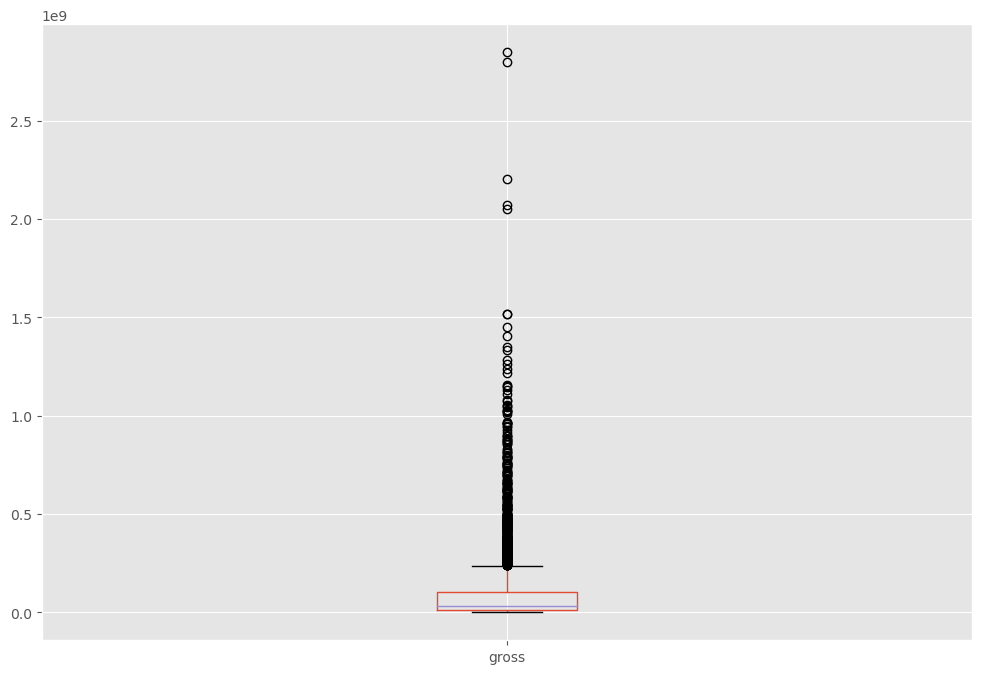

In [11]:
df.boxplot(column=['gross'])


#### Removing Outliers

In [74]:
z_scores = stats.zscore(df['gross'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

<AxesSubplot:>

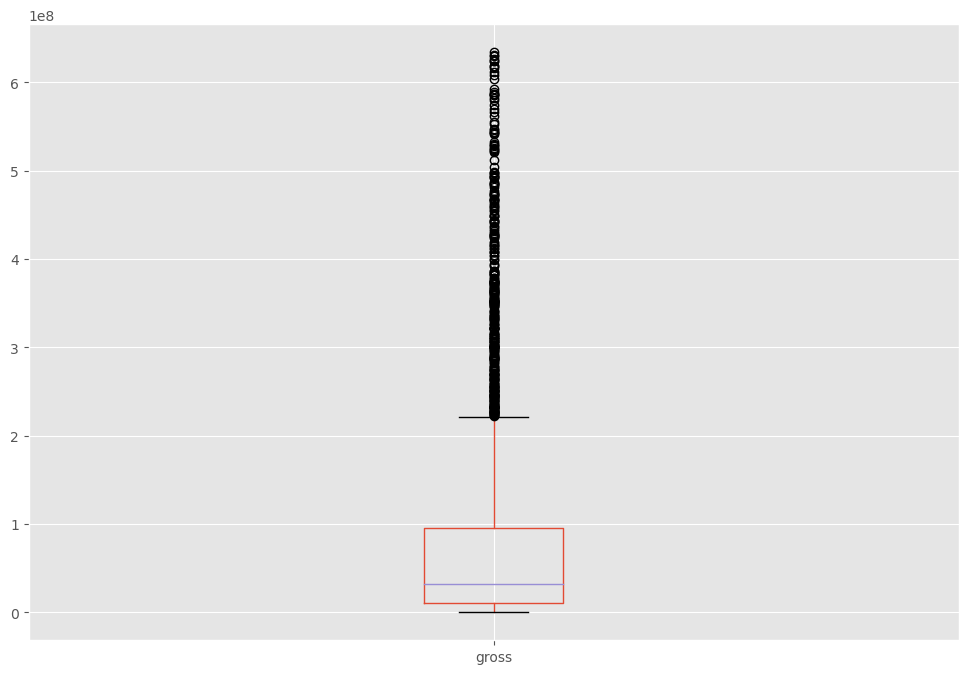

In [75]:
df.boxplot(column=['gross'])

## Data Exploration!

In my analysis, I explored and answered the correlation of a movie's success to key factors in its creation such as budget, company, genre, etc..



Text(0.5, 1.0, 'Gross Earnings vs Budget')

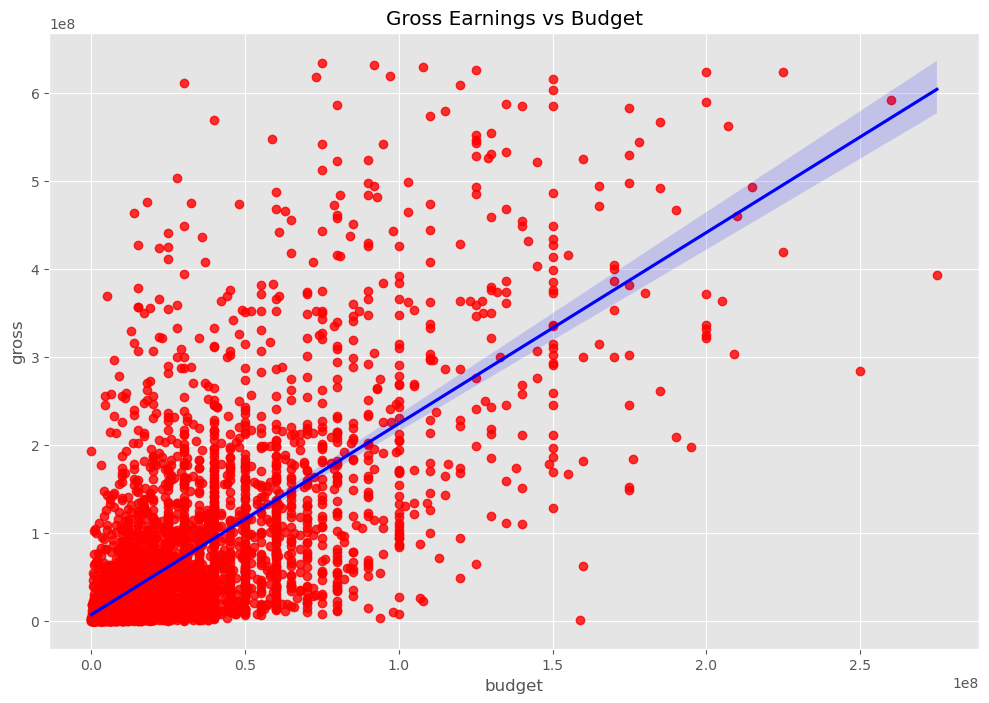

In [93]:
# Looking at correlation

sns.regplot(x="budget", y="gross", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Gross Earnings vs Budget')

From this graph, we can determine that there is a significant relationship between the budget and gross earnings of a movie.

### Correlation Matrix

Let's take a deeper look at the relationship of all the other variables to see what correlates the most to gross earnings.

#### Let's Update all the columns to numeric values
By doing this, we can show the correlation between all the variables and not only the ones with numerical values. This will help us to understand which variables are strongly or weakly correlated with each other. 

In [94]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth,profitability
0,1176,5,9,1980,10,123000.0,1519,2572,128,43,550000.0,39754601.0,935,95.0,0,8,71.281093
1,2389,5,3,1980,16,330000.0,1093,1047,1251,43,18000000.0,23402427.0,331,129.0,0,11,0.300135
2,3343,5,3,1980,5,10000.0,1739,235,337,43,10000000.0,15795189.0,1182,100.0,0,4,0.579519
3,268,3,0,1980,15,18000.0,202,2341,277,43,15000000.0,70687344.0,1133,116.0,0,11,3.712490
4,3179,3,1,1980,129,54000.0,698,1085,1093,34,5000000.0,30031783.0,270,109.0,4,9,5.006357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,321,5,0,2020,1765,140000.0,15,1992,1548,43,90000000.0,426505244.0,383,124.0,40,0,3.738947
6008,2729,3,0,2020,1766,102000.0,729,1920,122,43,85000000.0,319715683.0,935,99.0,40,1,2.761361
6009,895,3,1,2020,1765,53000.0,1562,2355,1252,43,175000000.0,245487753.0,1186,101.0,40,0,0.402787
6010,3028,3,1,2020,1767,42000.0,249,1738,539,6,135000000.0,111105497.0,10,100.0,40,1,-0.176996


#### Looking at the highest correlation

In [95]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Including only pairs that have a correlation greater than 0.5.
# A correlation coefficient of .50 or larger represents a strong or large correlation.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

gross          votes            0.557999
votes          gross            0.557999
budget         gross            0.682367
gross          budget           0.682367
year           released         0.997724
released       year             0.997724
               correctyear      0.998626
correctyear    released         0.998626
               year             0.998858
year           correctyear      0.998858
name           name             1.000000
star           star             1.000000
correctyear    correctyear      1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         r

#### Visualizing the data

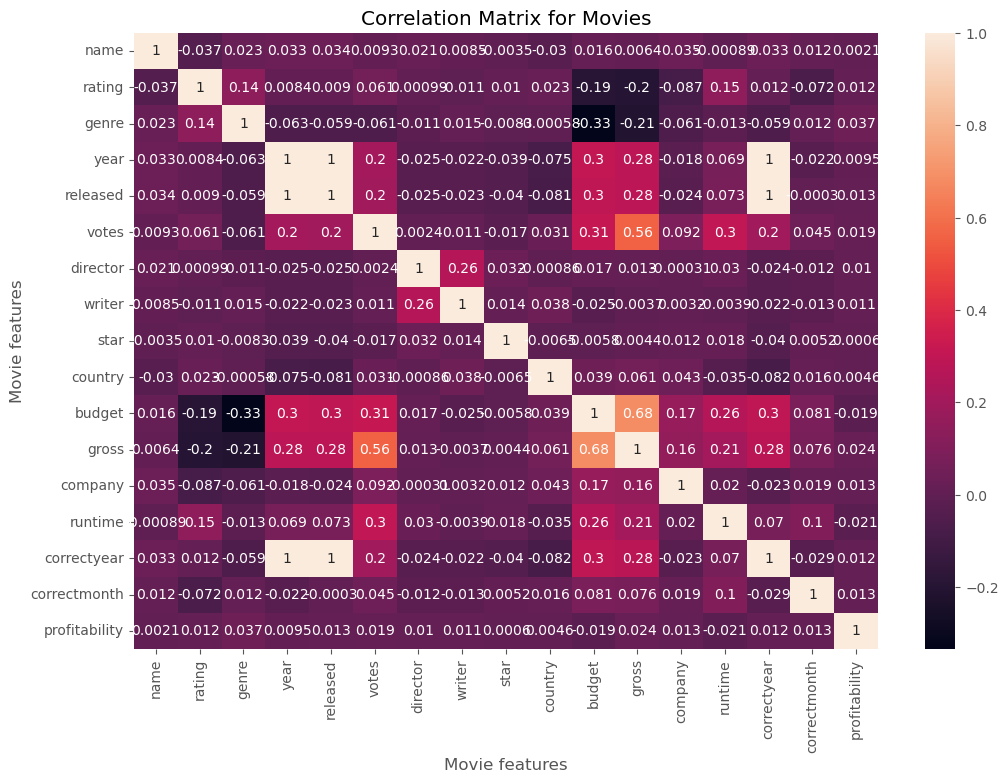

In [96]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

<b>Conclusion:</b> The factors contributing to the success of a movie are votes and budget as they have the highest correlation. It was also determined that the Company, Movie name, Genre had no correlation.

## Data Exploration Cont'd

While we have determined the factors contributing the most to a movie's success. There are still a few other factors we can explore.

<ul>
    <li>What is the best time of year to release a movie?</li>
    <li>What is the ideal runtime for a movie?</li>
    <li>What genre of movie had the most success on average?</li>
    <li>What genre of movie has the most success overall?</li>
</ul>

### What is the best time of year to release a movie?

*By grouping the Gross Earnings by Month, we can answer this question.*

#### Tabulating the data

In [32]:

df.groupby(['correctmonth']).mean()

,year,votes,budget,gross,runtime
correctmonth,,,,,
01,2002.330337,87933.896629,2.708138e+07,6.206133e+07,106.851685
02,2001.828729,101584.546961,3.077599e+07,7.637523e+07,105.883978
03,2001.750000,107112.392857,3.332767e+07,9.301620e+07,106.206633
04,2002.091644,95545.517520,3.020464e+07,8.801838e+07,105.824798
05,2001.805263,147799.647368,4.731544e+07,1.589717e+08,109.202632
06,2001.769231,119046.853147,3.606901e+07,9.214667e+07,110.293706
07,2001.324138,103716.510345,3.599994e+07,9.246908e+07,108.268966
08,2001.997727,84682.472727,2.626852e+07,6.090950e+07,105.088636
09,2001.320513,99197.269231,3.316988e+07,8.316971e+07,107.096154


#### Visualizing the data

range(1, 13)


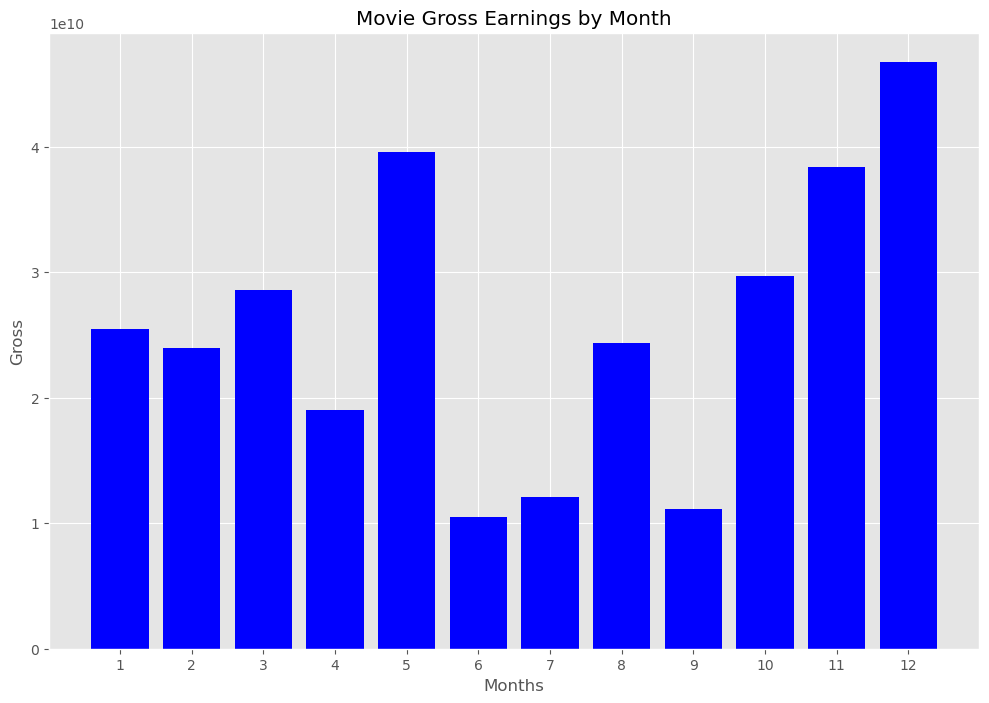

In [97]:
months = range(1,13)
print(months)

plt.bar(months,df.groupby(['correctmonth']).sum()['gross'], color=('blue'))
plt.xticks(months)
plt.title('Movie Gross Earnings by Month')
plt.ylabel('Gross')
plt.xlabel('Months')
plt.show()

<b>Conclusion:</b> The best time of year to release a movie is December based on the overall gross earnings in this period.

### What is the ideal runtime for a movie?

#### Tabulating the data

In [86]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()
gross_earnings_avg.sort_values()

runtime
209.0       968853.0
242.0      4770222.0
171.0      8064706.5
219.0      8204229.5
192.0     10284493.0
            ...     
149.0    415375961.0
181.0    424208848.0
183.0    449220945.0
163.0    497409852.0
187.0    562363449.0
Name: gross, Length: 121, dtype: float64

#### Visualizing the data

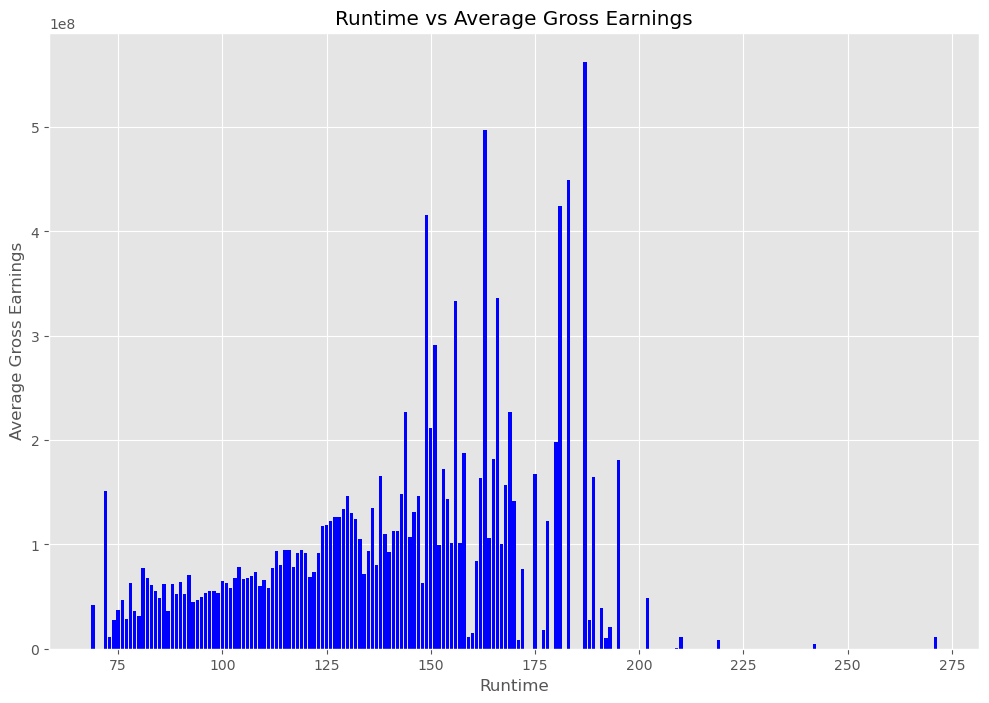

In [82]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()

plt.bar(gross_earnings_avg.index, gross_earnings_avg, color="blue")

plt.xlabel('Runtime')
plt.ylabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')

plt.show()


<b>Conclusion:</b> The ideal runtime seems to be between 160 to 190 minutes.

### What genre of movie has the most success overall? What genre of movie had the most success on average?

#### Visualizing the data

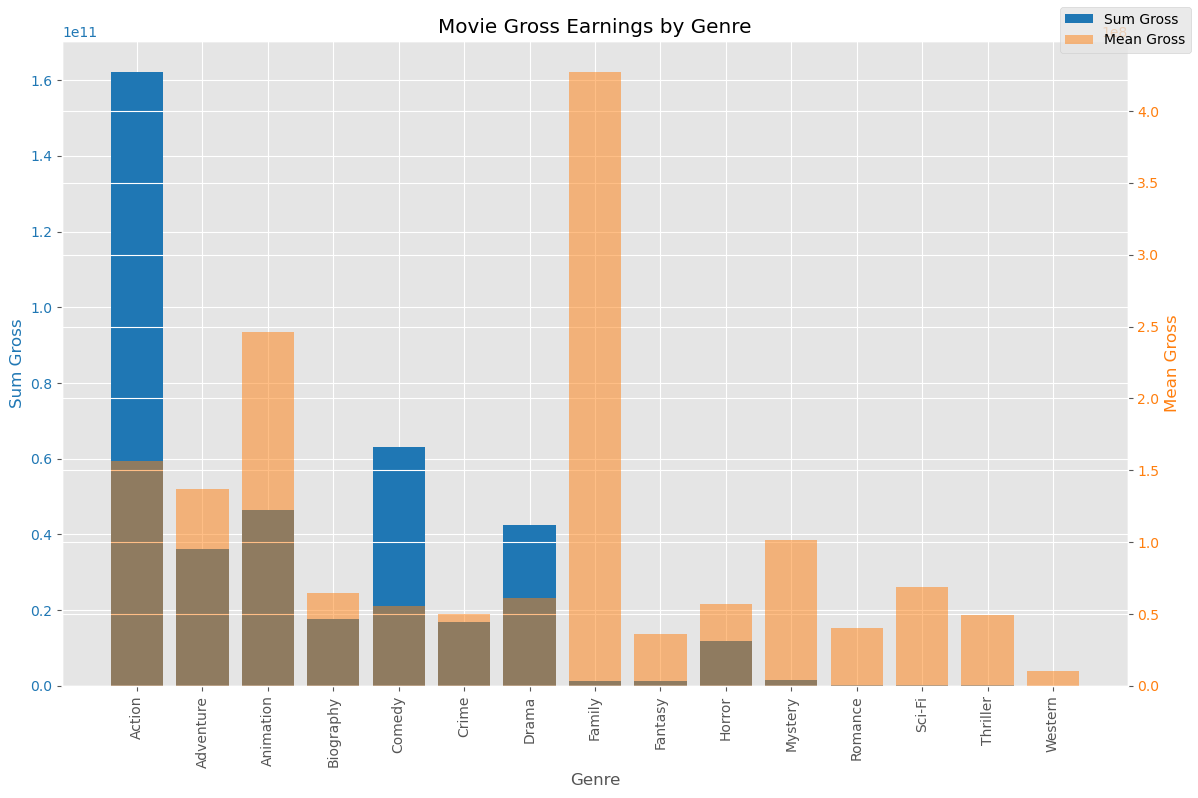

In [57]:
# Get the sum and mean of gross earnings for each genre
grouped_df = df.groupby(['genre'])['gross'].agg(['sum', 'mean'])
genres = grouped_df.index.tolist()
sum_gross = grouped_df['sum'].tolist()
mean_gross = grouped_df['mean'].tolist()

# Set up the bar chart
fig, ax1 = plt.subplots()

# Plot the bar chart for sum gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)


# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean gross and coefficient of variation
color = 'tab:orange'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean Gross')
#ax2.plot(genres, cv_gross, color='tab:red', marker='o', label='Coefficient of Variation')

# Add labels and title
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()


<b>Conclusion:</b> The Action genre had the highest level of success across all movies, whereas the Family genre had the highest average success rate.

## Conclusion: 

My analysis revealed that the most significant factors contributing to a movie's success were the production the movie's budget, and the votes. Additionally, certain genres, such as action and family, tended to be more successful than others.

Overall, my Python data analysis project provided valuable insights into the factors contributing to the success of a movie.